## Exploratory analysis of GWO / U.S. Hail relationship
###### Inputs: gwo.csv  |  1955-2016_hail.csv
##### Dr. Victor Gensini (Fall 2017)
##### Department of Geographic and Atmospheric Sciences
##### Northern Illinois University

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.ndimage

### Read in datasets & do some Pandas magic

In [2]:
hail_file = '1955-2016_hail.csv'
gwo_file = 'gwo.csv'
hail_df = pd.read_csv(hail_file)
gwo_df = pd.read_csv(gwo_file)
formats = '%Y-%m-%d'
hail_df['date']=pd.to_datetime(hail_df['date'], format=formats)
hail_df=hail_df.set_index(pd.DatetimeIndex(hail_df['date']))
gwo_df['date']=pd.to_datetime(gwo_df['date'], format=formats)
gwo_df=gwo_df.set_index(pd.DatetimeIndex(gwo_df['date']))
gwo1days_df = gwo_df[gwo_df.amp>=1]
sevhail_df = hail_df[hail_df.mag>=1]
sighail_df = hail_df[hail_df.mag>=2]
gianthail_df = hail_df[hail_df.mag>=4]
sev_hail_df=gwo1days_df.loc[gwo1days_df['date'].isin(sevhail_df['date'])]
sig_hail_df=gwo1days_df.loc[gwo1days_df['date'].isin(sighail_df['date'])]
giant_hail_df=gwo1days_df.loc[gwo1days_df['date'].isin(gianthail_df['date'])]

### Create 2d histograms

In [3]:
sev_hist,xedges,yedges = np.histogram2d(sev_hail_df.dt,sev_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
sig_hist,xedges,yedges = np.histogram2d(sig_hail_df.dt,sig_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
giant_hist,xedges,yedges = np.histogram2d(giant_hail_df.dt,giant_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
gwo1_hist,xedges,yedges = np.histogram2d(gwo1days_df.dt,gwo1days_df.aam,bins=40,range=[[-4,4],[-4,4]])

### Calculate probabilities

In [4]:
sev_prob = np.divide(sev_hist,np.sum(sev_hist))
sig_prob = np.divide(sig_hist,np.sum(sig_hist))
giant_prob = np.divide(giant_hist,np.sum(giant_hist))
gwo1_prob = np.divide(gwo1_hist,np.sum(gwo1_hist))

### Calculate probability anomalies

In [5]:
sev_anom = sev_prob - gwo1_prob
sig_anom = sig_prob - gwo1_prob
giant_anom = giant_prob - gwo1_prob

#Guassian smooth probs
sigma = 1
sev_anom = scipy.ndimage.filters.gaussian_filter(sev_anom,sigma,order=0)
sig_anom = scipy.ndimage.filters.gaussian_filter(sig_anom,sigma,order=0)
giant_anom = scipy.ndimage.filters.gaussian_filter(giant_anom,sigma,order=0)

### Make plots

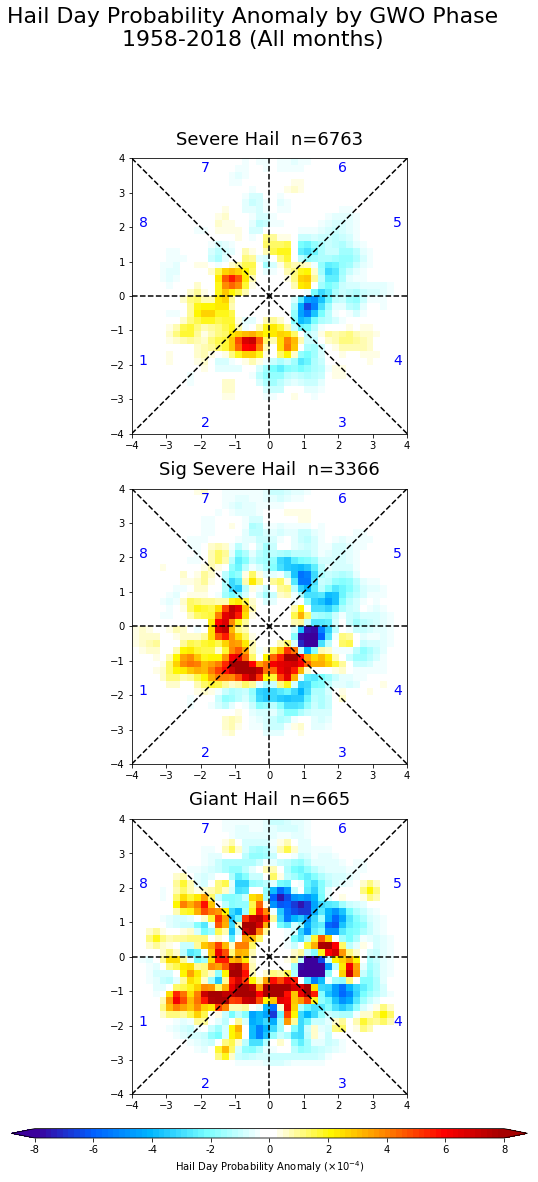

In [6]:
fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(18.5,21)
for ax in np.arange(0,3,1):
    axes.flat[ax].plot([-4,0],[4,0],'black',ls='--')
    axes.flat[ax].plot([-4,0],[0,0],'black',ls='--')
    axes.flat[ax].plot([-4,0],[-4,0],'black',ls='--')
    axes.flat[ax].plot([0,0],[-4,0],'black',ls='--')
    axes.flat[ax].plot([4,0],[-4,0],'black',ls='--')
    axes.flat[ax].plot([4,0],[0,0],'black',ls='--')
    axes.flat[ax].plot([4,0],[4,0],'black',ls='--')
    axes.flat[ax].plot([0,0],[4,0],'black',ls='--')
    axes.flat[ax].annotate('8', xy=(-3.8, 2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('1', xy=(-3.8, -2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('2', xy=(-2,-3.8),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('3', xy=(2,-3.8),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('4', xy=(3.6,-2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('5', xy=(3.6,2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('6', xy=(2,3.6),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('7', xy=(-2,3.6),  xycoords='data',color='b', fontsize=14)

temper_anom = ['#3c009c','#3609A5','#3013AF','#2A1CB9','#2426C3','#1E30CD','#1839D7','#1243E1','#0C4CEB','#0656F5','#0060FF','#0068FF','#0071FF','#0079FF','#0082FF','#008BFF','#0093FF','#009CFF','#00A4FF','#00ADFF','#00B6FF','#0CBDFF','#18C4FF','#24CBFF','#30D3FF','#3CDAFF','#48E1FF','#54E9FF','#60F0FF','#6CF7FF','#79FFFF','#86FFFF','#93FFFF','#A1FFFF','#AEFFFF','#BCFFFF','#C9FFFF','#D6FFFF','#E4FFFF','#F1FFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFEE5','#FFFDCC','#FFFCB2','#FFFB99','#FFFB7F','#FFFA66','#FFF94C','#FFF833','#FFF719','#FFF700','#FFEB00','#FFDF00','#FFD300','#FFC700','#FFBB00','#FFAF00','#FFA300','#FF9700','#FF8B00','#FF7F00','#FE7200','#FE6500','#FE5800','#FE4C00','#FE3F00','#FE3200','#FE2600','#FE1900','#FE0C00','#FE0000','#F50000','#EC0000','#E30000','#DA0000','#D20000','#C90000','#C00000','#B70000','#AE0000','#A60000']
cmap = matplotlib.colors.ListedColormap(temper_anom)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1] ]
track=axes.flat[0].imshow(sev_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmax=.0008,vmin=-.0008)
axes.flat[1].imshow(sig_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmax=.0008,vmin=-.0008)
axes.flat[2].imshow(giant_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmax=.0008,vmin=-.0008)
cbar = fig.colorbar(track,ax=axes.ravel().tolist(),ticks=np.arange(-.0008,.000815,.0002), orientation='horizontal', pad=.03,aspect=50, shrink=.5, extend='both')
cbar.ax.set_xticklabels(['-8','-6','-4','-2','0','2','4','6','8'])# horizontal colorbar
cbar.set_label('Hail Day Probability Anomaly ' +r'$(\times10^{-4})$' )
axes.flat[0].annotate('Severe Hail  n='+str(sev_hail_df['date'].count()),(.5,1.05), xycoords='axes fraction', ha='center', fontsize=18)
axes.flat[1].annotate('Sig Severe Hail  n='+str(sig_hail_df['date'].count()),(.5,1.05), xycoords='axes fraction', ha='center', fontsize=18)
axes.flat[2].annotate('Giant Hail  n='+str(giant_hail_df['date'].count()),(.5,1.05), xycoords='axes fraction', ha='center', fontsize=18)
fig.suptitle('Hail Day Probability Anomaly by GWO Phase\n1958-2018 (All months)', fontsize=22)
plt.show()